In [1]:
1+2


3

In [2]:
import uproot
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import h5py
import math

from util import *

import var
import cut
import data
import hist

import importlib

from pyanalib import panda_helpers
from unc_funcs import *

/icarus/app/users/jdyer/dev_sbnana_v09_69_01/srcs/sbnana/sbnana/SBNAna/icarus-analysis-villiage/pyana/dimuon-tools/env/lib/python3.9/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.20.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
savestuff = False

POTSTR = "2e20 POT"

dir = '/icarus/data/users/jdyer/muon_selection/dfs/all_nus_bg/with_kin/'

In [18]:
evtdf = pd.read_pickle(dir + 'final_df')
mc_res = pd.read_pickle(dir + 'res_mc')
pc_res = pd.read_pickle(dir + 'res_percent')
pot_res = pd.read_pickle(dir + 'res_pot')


In [19]:
mc_res

,"$M_S$ = 220, $\theta_S$ = 5e-05","$M_S$ = 240, $\theta_S$ = 5e-05","$M_S$ = 260, $\theta_S$ = 5e-05","$M_S$ = 300, $\theta_S$ = 3e-05","$M_S$ = 330, $\theta_S$ = 2e-05","$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = 1000000.0","$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = 1000000.0","$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = 1000000.0",$\nu$,Cosmic
preselection,321,863,983,2264,2452,10808,11041,14752,16270,7074,18573,16908,74739,190985
below 0_5cm dqdx <= 500000.0,312,825,936,2180,2367,10386,10594,14202,15683,7074,17790,16171,66277,179503
up to 1cm dqdx <= 240000.0,310,820,926,2164,2351,10275,10493,14074,15549,7074,17626,16011,59955,170144
up to 2cm dqdx <= 200000.0,307,816,920,2151,2336,10180,10400,13946,15414,7074,17501,15904,52862,161463
up to 3cmdqdx <= 160000.0,305,811,916,2140,2320,10109,10306,13829,15293,7074,17374,15807,48565,157149
max shower len < 0 cm,259,685,791,1851,2022,8590,8830,11811,13045,6101,15063,13764,27908,122910
both chi2mu < 18,234,658,746,1757,1914,8048,8260,10970,12059,5627,13829,12533,19895,86419
both chi2p > 90,226,649,740,1740,1894,7942,8151,10827,11906,5562,13677,12372,18783,83337
S_NuMI_angle < 0.05 rad,77,331,372,909,996,4574,4786,6155,6410,2881,6450,5443,539,53
opening angle < 0.35 rad,75,317,325,774,722,4027,3891,4762,4976,1518,2507,1705,44,18


In [20]:
pot_res

,"$M_S$ = 220, $\theta_S$ = 5e-05","$M_S$ = 240, $\theta_S$ = 5e-05","$M_S$ = 260, $\theta_S$ = 5e-05","$M_S$ = 300, $\theta_S$ = 3e-05","$M_S$ = 330, $\theta_S$ = 2e-05","$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0","$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = 1000000.0","$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = 1000000.0","$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = 1000000.0",$\nu$,Cosmic
preselection,3.03,30.03,54.11,4.67,1.68,3.62,5.23,7.92,15.10,0.03,0.06,0.03,18438.07,40256.09
below 0_5cm dqdx <= 500000.0,2.94,28.71,51.52,4.50,1.62,3.48,5.01,7.62,14.55,0.03,0.05,0.02,16350.50,37820.47
up to 1cm dqdx <= 240000.0,2.92,28.53,50.97,4.46,1.61,3.44,4.97,7.55,14.43,0.03,0.05,0.02,14790.87,35838.55
up to 2cm dqdx <= 200000.0,2.90,28.40,50.64,4.44,1.60,3.41,4.92,7.48,14.30,0.03,0.05,0.02,13041.03,34003.39
up to 3cmdqdx <= 160000.0,2.88,28.22,50.42,4.42,1.59,3.38,4.88,7.42,14.19,0.03,0.05,0.02,11980.96,33088.28
max shower len < 0 cm,2.44,23.84,43.54,3.82,1.38,2.88,4.18,6.34,12.11,0.02,0.05,0.02,6884.89,25940.38
both chi2mu < 18,2.21,22.90,41.07,3.63,1.31,2.69,3.91,5.89,11.19,0.02,0.04,0.02,4908.09,18279.46
both chi2p > 90,2.13,22.58,40.74,3.59,1.30,2.66,3.86,5.81,11.05,0.02,0.04,0.02,4633.76,17637.54
S_NuMI_angle < 0.05 rad,0.73,11.52,20.48,1.88,0.68,1.53,2.27,3.30,5.95,0.01,0.02,0.01,132.97,3.26
opening angle < 0.35 rad,0.71,11.03,17.89,1.60,0.49,1.35,1.84,2.56,4.62,0.01,0.01,0.00,10.85,0.04


In [21]:
categories = make_categories(evtdf)
for sample in categories:
    print(sample.name)

$M_S$ = 220, $\theta_S$ = 5e-05
$M_S$ = 240, $\theta_S$ = 5e-05
$M_S$ = 260, $\theta_S$ = 5e-05
$M_S$ = 300, $\theta_S$ = 3e-05
$M_S$ = 330, $\theta_S$ = 2e-05
$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0
$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = 1000000.0
$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = 1000000.0
$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = 1000000.0
$\nu$
Cosmic


In [6]:
for c in evtdf.columns:
    print(c)

('slc', 'is_clear_cosmic', '', '', '', '')
('slc', 'vertex', 'x', '', '', '')
('slc', 'vertex', 'y', '', '', '')
('slc', 'vertex', 'z', '', '', '')
('slc', 'self', '', '', '', '')
('slc', 'tmatch', 'eff', '', '', '')
('slc', 'tmatch', 'pur', '', '', '')
('slc', 'tmatch', 'idx', '', '', '')
('slc', 'producer', '', '', '', '')
('slc', 'nuid', 'crlongtrkdiry', '', '', '')
('slc', 'truth', 'E', '', '', '')
('slc', 'truth', 'bjorkenX', '', '', '')
('slc', 'truth', 'inelasticityY', '', '', '')
('slc', 'truth', 'Q2', '', '', '')
('slc', 'truth', 'w', '', '', '')
('slc', 'truth', 't', '', '', '')
('slc', 'truth', 'position', 'x', '', '')
('slc', 'truth', 'position', 'y', '', '')
('slc', 'truth', 'position', 'z', '', '')
('slc', 'truth', 'pdg', '', '', '')
('slc', 'truth', 'iscc', '', '', '')
('slc', 'truth', 'genie_mode', '', '', '')
('slc', 'truth', 'max_proton_ke', '', '', '')
('slc', 'truth', 'nn', '', '', '')
('slc', 'truth', 'np', '', '', '')
('slc', 'truth', 'npi', '', '', '')
('slc', 't

In [10]:
pd.DataFrame(evtdf['proc'])

proc
sample __ntuple entry rec.slc..index                                              
0      10       6     0                                                      110.0
       49       2     1                                                      147.0
       87       20    10                                                     184.0
       105      15    14                                                     201.0
       110      13    0                                                      207.0
...                                                                            ...
12     4279     172   1                   4853.0
Name: (4279, 172), dtype: float64
       4444     45    0                    5000.0
Name: (4444, 45), dtype: float64
       4502     127   19                  5053.0
Name: (4502, 127), dtype: float64
       6150     236   17                  6539.0
Name: (6150, 236), dtype: float64
       6645     120   0                   6987.0
Name: (6645, 120), dtype: float64

[17267 rows x 1 columns]

In [11]:
pd.DataFrame(evtdf['cluster'])

cluster
sample __ntuple entry rec.slc..index                                                 
0      10       6     0                                                     1898902.0
       49       2     1                                                     1898902.0
       87       20    10                                                    1898902.0
       105      15    14                                                    1898902.0
       110      13    0                                                     1898902.0
...                                                                               ...
12     4279     172   1                   4444026.0
Name: (4279, 172), dtype: float64
       4444     45    0                    4444026.0
Name: (4444, 45), dtype: float64
       4502     127   19                  4444026.0
Name: (4502, 127), dtype: float64
       6150     236   17                  4444026.0
Name: (6150, 236), dtype: float64
       6645     120   0                   4444026.0
Name: (6645, 120), dtype: float64

[17267 rows x 1 columns]

# HPS

In [22]:
higgs_files = [
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/higgs_M220_DMCP2023G_evt_new.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/higgs_M240_DMCP2023G_evt_new.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/higgs_M260_DMCP2023G_evt_new.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/higgs_M300_DMCP2023G_evt_new.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/higgs_M330_DMCP2023G_evt_new.df",
]
higgs_mcdfs = [pd.read_hdf(f, key="mch") for f in higgs_files]
higgs_masses = [int(round(df.iloc[(0)].M*1000.)) for df in higgs_mcdfs]
higgs_thetas = [float(df.iloc[(0)].C1) for df in higgs_mcdfs]

In [26]:
#%%time
# MY WAY

#low_lim = []
#low_lim_count = [] 
#hi_lim = []
#hi_lim_count = []
test_thetas = np.logspace(-5,-3,51)
higgs_new_ns = [] # one thing per sample, each thing has same length as test_thetas.
for i in range(5):
    new_n = []
    df = evtdf[categories[i]]
    name = categories[i].name
    print('Working on %a' % name)
    old_th = higgs_thetas[i]
    for new_mixing in test_thetas:
        rescale_new_mixing = []
        for idx in df.index:
            #print(idx)
            row = higgs_mcdfs[i].loc[(idx[1],idx[2], 0)]
            factor = float(reweight_mixing(new_mixing, row.start, row.enter, row.exit, row.decay_length, old_th))
            #print(factor)
            rescale_new_mixing.append(factor)
        #print(np.array(df.scale).shape, ', ', np.array(rescale_new_mixing).shape)
        x = sum(np.array(df.scale)*np.array(rescale_new_mixing))
        #print(df.shape, len(rescale_new_mixing), x, sep=', ')
        new_n.append(x)
    higgs_new_ns.append(np.array(new_n))
    print('Best theta: ', test_thetas[np.argmax(np.array(new_n))], '\n')
    #break
    
    #plt.plot(test_thetas, np.array(new_n), '-o', label=name.split(',')[0], color=blues[i])
    #plt.xscale('log')
    #plt.title(name.split(',')[0])
    #plt.ylabel("Candidates / %s" % POTSTR)
    #plt.xlabel("$\\theta$")
    #plt.show()

#plt.xscale('log')
#plt.title('Higgs Portal Scalars that pass selection')
#plt.ylabel("Candidates / %s" % POTSTR)
#plt.xlabel("$\\theta$")
#plt.legend()
#plt.show()

        

Working on '$M_S$ = 220, $\\theta_S$ = 5e-05'
Best theta:  0.0003630780547701014 

Working on '$M_S$ = 240, $\\theta_S$ = 5e-05'
Best theta:  0.00015848931924611142 

Working on '$M_S$ = 260, $\\theta_S$ = 5e-05'
Best theta:  0.00010964781961431851 

Working on '$M_S$ = 300, $\\theta_S$ = 3e-05'
Best theta:  3.6307805477010174e-05 

Working on '$M_S$ = 330, $\\theta_S$ = 2e-05'
Best theta:  3.0199517204020192e-05 



In [52]:
%%time
# JOSH'S WAY (use intersection of dataframes)

test_thetas = np.logspace(-5,-3,51)
higgs_new_ns = [] # one thing per sample, each thing has same length as test_thetas.
for i in range(5):
    new_n = []
    df = evtdf[categories[i]].loc[i].droplevel('rec.slc..index')
    mc = higgs_mcdfs[i].droplevel('rec.mc.prtl..index')
    name = categories[i].name
    print('Working on %a' % name)
    old_th = higgs_thetas[i]
    for new_mixing in test_thetas:
        #rescale_new_mixing = []
        ##cd_for_w = this_mcdf.loc[this_mcdf.index.intersection(this_evtdf.index), ("C","D")]
        ##cd_for_w["RW"] = cd_for_w.apply(lambda x : reweight(a = x["C"],b = x["D"]), axis = 1)
        #intersection = higgs_mcdfs[i].index.intersection(df.index)
        #cd_for_w.index.droplevel('rec.slc..index').intersection(new.index.droplevel('rec.mc.prtl..index'))
        intersection = mc.index.intersection(df.index)
        #cd_for_w = higgs_mcdfs[i].loc[intersection, 
        #                              ["start","enter", "exit", "decay_length"]]
        cd_for_w = mc.loc[intersection, ["start","enter", "exit", "decay_length"]]
        #print(intersection)
        #cd_for_w = higgs_mcdfs[i].loc[df.index.intersection(higgs_mcdfs[i].index), 
        #                              ["start","enter", "exit", "decay_length"]]
        new = df.loc[intersection]
        rescale_new_mixing = cd_for_w.apply(lambda x : 
                                            float(reweight_mixing(new_mixing, x["start"], x["enter"], 
                                                                  x["exit"], x["decay_length"], old_th)),
                                            axis = 1)
        
        #for idx in df.index:
        #    row = higgs_mcdfs[i].loc[(idx[1],idx[2], 0)]
        #    factor = float(reweight_mixing(new_mixing, row.start, row.enter, row.exit, row.decay_length, old_th))
        #    #print(factor)
        #    rescale_new_mixing.append(factor)
        ##print(np.array(df.scale).shape, ', ', np.array(rescale_new_mixing).shape)
        #x = sum(np.array(df.scale)*np.array(rescale_new_mixing))
        x = sum(np.array(new.scale)*np.array(rescale_new_mixing))
        #print(new.shape, len(rescale_new_mixing), x, sep=', ')
        new_n.append(x)
    higgs_new_ns.append(np.array(new_n))
    #break
    
    

Working on '$M_S$ = 220, $\\theta_S$ = 5e-05'
CPU times: user 6.2 s, sys: 30.4 ms, total: 6.23 s
Wall time: 6.17 s


In [37]:
cd_for_w
print(new.shape)
print(len(rescale_new_mixing))
df.scale



(14, 207)
14


__ntuple  entry  rec.slc..index
10        6      0                 0.009434
49        2      1                 0.009434
87        20     10                0.009434
105       15     14                0.009434
110       13     0                 0.009434
122       0      13                0.009434
146       2      0                 0.009434
154       6      1                 0.009434
190       19     25                0.009434
193       14     17                0.009434
          21     0                 0.009434
201       20     1                 0.009434
199       20     23                0.009434
202       2      0                 0.009434
225       17     1                 0.009434
227       3      18                0.009434
235       2      0                 0.009434
245       5      8                 0.009434
247       10     0                 0.009434
274       13     15                0.009434
284       23     10                0.009434
281       12     0                 0.009434


In [35]:
#df = evtdf[categories[i]].loc[i]
df

slc                          \
                                     is_clear_cosmic      vertex               
                                                               x           y   
                                                                               
                                                                               
                                                                               
sample __ntuple entry rec.slc..index                                           
0      10       6     0                            0 -137.550140   80.211090   
       49       2     1                            0 -139.672394  -60.575729   
       87       20    10                           0  210.485367  -56.962399   
       105      15    14                           0  142.216400  -46.298374   
       110      13    0                            0 -165.103683 -161.912247   
       122      0     13                           0  250.796585   53.929626   
       146      2     0                            0 -197.539520   -9.765320   
       154      6     1                            0 -206.986938  -15.005005   
       190      19    25                           0  270.662567   94.388680   
       193      14    17                           0  279.132782    8.091087   
                21    0                            0 -138.661697  -84.157585   
       201      20    1                            0 -210.047302  -20.110046   
       199      20    23                           0  284.081482  -95.449829   
       202      2     0                            0 -125.359375 -170.418274   
       225      17    1                            0 -140.821899 -119.782852   
       227      3     18                           0  288.968536   37.398987   
       235      2     0                            0 -180.073776  -29.640488   
       245      5     8                            0  210.648300  113.705048   
       247      10    0                            0 -139.407974   -1.176378   
       274      13    15                           0  139.659500  -55.110107   
       284      23    10                           0   94.568077  -90.629402   
       281      12    0                            0 -281.777435 -167.320923   
       288      17    1                            0 -136.158234 -141.459091   
       293      17    11                           0  265.629333    4.073792   
       299      17    0                            0 -138.747635 -111.321411   
       323      20    0                            0 -130.857574  -61.670364   
       361      0     0                            0 -191.038788  122.332596   
       366      5     1                            0 -337.390472  111.800217   
       399      1     15                           0  159.940720   49.220825   
       400      15    20                           0  257.769196 -150.307617   
       422      2     10                           0  279.447144  -83.258881   
       429      24    0                            0 -164.759720  108.737915   
       437      11    13                           0   94.665161  116.626083   
       440      24    0                            0 -256.908569  -17.148308   
       453      5     16                           0  237.074188  -44.609650   
       457      7     0                            0 -253.014053  -84.815384   
       460      4     22                           0  210.509445  -14.240295   

                                                                               \
                                                 self    tmatch                 
                                               z            eff       pur idx   
                                                                                
                                                                                
                                                                                
sample __ntuple entry rec.slc..index      

In [19]:
print(pd.DataFrame(rescale_new_mixing).shape)
print(df.shape)

(14, 1)
(37, 207)


In [8]:

for c in higgs_mcdfs[0].columns:
    print(c)
    
    #["decay_length"]



('E', '')
('M', '')
('start', 'x')
('start', 'y')
('start', 'z')
('enter', 'x')
('enter', 'y')
('enter', 'z')
('exit', 'x')
('exit', 'y')
('exit', 'z')
('decay_length', '')
('C1', '')
('C2', '')
('C3', '')
('C4', '')
('C5', '')


In [11]:
df



slc                          \
                              is_clear_cosmic      vertex               
                                                        x           y   
                                                                        
                                                                        
                                                                        
__ntuple entry rec.slc..index                                           
10       6     0                            0 -137.550140   80.211090   
49       2     1                            0 -139.672394  -60.575729   
87       20    10                           0  210.485367  -56.962399   
105      15    14                           0  142.216400  -46.298374   
110      13    0                            0 -165.103683 -161.912247   
122      0     13                           0  250.796585   53.929626   
146      2     0                            0 -197.539520   -9.765320   
154      6     1                            0 -206.986938  -15.005005   
190      19    25                           0  270.662567   94.388680   
193      14    17                           0  279.132782    8.091087   
         21    0                            0 -138.661697  -84.157585   
201      20    1                            0 -210.047302  -20.110046   
199      20    23                           0  284.081482  -95.449829   
202      2     0                            0 -125.359375 -170.418274   
225      17    1                            0 -140.821899 -119.782852   
227      3     18                           0  288.968536   37.398987   
235      2     0                            0 -180.073776  -29.640488   
245      5     8                            0  210.648300  113.705048   
247      10    0                            0 -139.407974   -1.176378   
274      13    15                           0  139.659500  -55.110107   
284      23    10                           0   94.568077  -90.629402   
281      12    0                            0 -281.777435 -167.320923   
288      17    1                            0 -136.158234 -141.459091   
293      17    11                           0  265.629333    4.073792   
299      17    0                            0 -138.747635 -111.321411   
323      20    0                            0 -130.857574  -61.670364   
361      0     0                            0 -191.038788  122.332596   
366      5     1                            0 -337.390472  111.800217   
399      1     15                           0  159.940720   49.220825   
400      15    20                           0  257.769196 -150.307617   
422      2     10                           0  279.447144  -83.258881   
429      24    0                            0 -164.759720  108.737915   
437      11    13                           0   94.665161  116.626083   
440      24    0                            0 -256.908569  -17.148308   
453      5     16                           0  237.074188  -44.609650   
457      7     0                            0 -253.014053  -84.815384   
460      4     22                           0  210.509445  -14.240295   

                                                                        \
                                          self    tmatch                 
                                        z            eff       pur idx   
                                                                         
                                                                         
                                                                         
__ntuple entry rec.slc..index                                            
10       6     0               556.435852  182  0.922363  0.988839   0   
49       2     1              -293.824646  250  0.709152  0.944103   0   
87       20    10             -195.739227  130  0.867942  0.989385   0   
105      15    14              404.727722  176  0.848213  0.992334   0   
110      13    

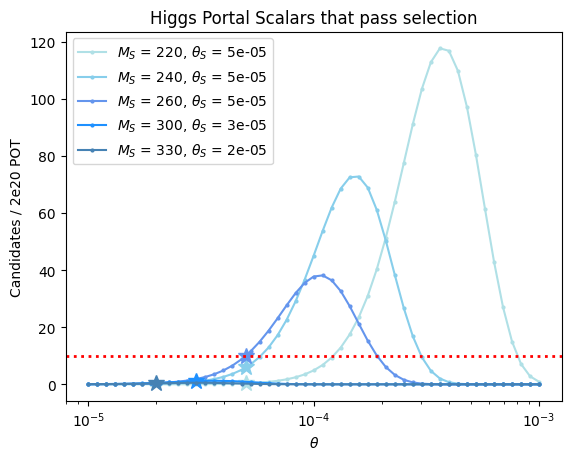

In [34]:
# Overlay all benchmark masses on same plot:

for i in range(5):
    plt.plot(test_thetas, higgs_new_ns[i], '-o', markersize=2, label=categories[i].name, color=blues[i]) #label=categories[i].name.split(',')[0],
    plt.plot(higgs_thetas[i], sum(np.array(evtdf[categories[i]].scale)),'*', markersize=12, color=blues[i])
plt.xscale('log')
plt.title('Higgs Portal Scalars that pass selection')
plt.ylabel("Candidates / %s" % POTSTR)
plt.xlabel("$\\theta$")
plt.axhline([10], linestyle=":", color="r", linewidth=2)
plt.legend()
if savestuff:
    plt.savefig(dir + "higgs_theta_sensitivity.pdf")
plt.show()



In [12]:
# Skip this cell for now - come back to it when I want to make a real contour plot.
low_lim = []
low_lim_count = [] 
hi_lim = []
hi_lim_count = []
goal = 10
for i in range(5):
    print(i)
    new_n = np.array(new_ns[i])
    n_prev_from_goal = -10.
    found_low_lim = False
    for j in range(len(new_n)):
        n_current_from_goal = new_n[j]-goal
        if np.sign(n_prev_from_goal) != np.sign(n_current_from_goal): # then you just hit your goal
            #print('yip! ', categories[i].name, n_prev_from_goal, n_current_from_goal, sep=', ')
            if found_low_lim == False:
                if np.abs(n_prev_from_goal) < np.abs(n_current_from_goal):
                    low_lim_count.append(new_n[j-1])
                    low_lim.append(test_thetas[j-1])
                else:
                    low_lim_count.append(new_n[j])
                    low_lim.append(test_thetas[j])
                found_low_lim = True
            else:
                if np.abs(n_prev_from_goal) < np.abs(n_current_from_goal):
                    hi_lim_count.append(new_n[j-1])
                    hi_lim.append(test_thetas[j-1])
                else:
                    hi_lim_count.append(new_n[j])
                    hi_lim.append(test_thetas[j])
        n_prev_from_goal = n_current_from_goal
    if new_n[new_n >= goal].shape[0] == 0:
        low_lim_count.append(-1)
        low_lim.append(-1)
        hi_lim_count.append(-1)
        hi_lim.append(-1)
        

0


NameError: name 'new_ns' is not defined

# ALPs

In [6]:
alp_nosup_files = [
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M300_DMC2023G_evt.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M350_DMC2023G_evt.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M400_DMC2023G_evt.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M450_DMC2023G_evt.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M500_DMC2023G_evt.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M600_DMC2023G_evt.df",
    "/icarus/data/users/gputnam/dimuon-data/higgs-gen-A/axion-no-suppression/alp_M650_DMC2023G_evt.df"
]
alp_nosup_mcdfs = [pd.read_hdf(f, key="mch") for f in alp_nosup_files]
alp_nosup_masses = [int(round(df.iloc[(0)].M*1000.)) for df in alp_nosup_mcdfs]
alp_nosup_fa = [float(df.iloc[(0)].C1) for df in alp_nosup_mcdfs] #play with this one!
alp_nosup_inv_fa = [1./float(df.iloc[(0)].C1) for df in alp_nosup_mcdfs] #play with this one!
alp_nosup_cl = [float(df.iloc[(0)].C2) for df in alp_nosup_mcdfs]



In [6]:
for c in alp_nosup_mcdfs[0].columns:
    print(c)
float(alp_nosup_mcdfs[0].iloc[0].C2)

('E', '')
('M', '')
('start', 'x')
('start', 'y')
('start', 'z')
('enter', 'x')
('enter', 'y')
('enter', 'z')
('exit', 'x')
('exit', 'y')
('exit', 'z')
('decay_length', '')
('allowed_decay_fraction', '')
('C1', '')
('C2', '')
('C3', '')
('C4', '')
('C5', '')


0.01

Scanning over fa's for '$M_{ALP}$ = 300, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.0033333333333333335


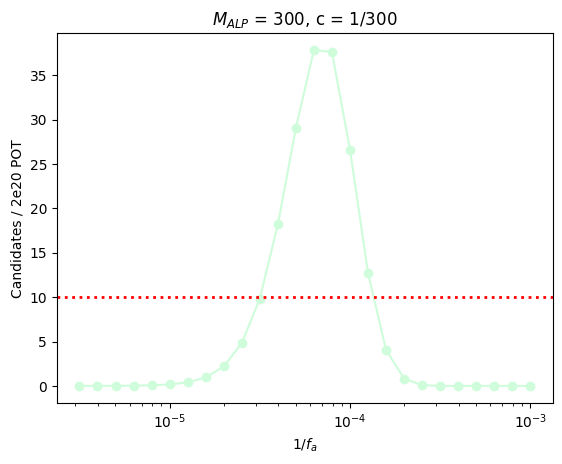

Scanning over fa's for '$M_{ALP}$ = 350, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.0033333333333333335


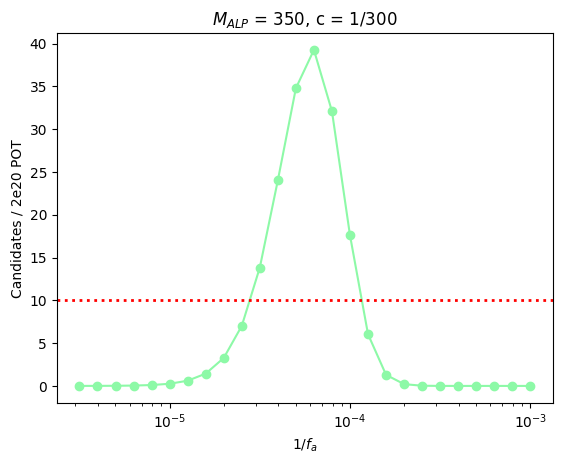

Scanning over fa's for '$M_{ALP}$ = 400, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.0033333333333333335


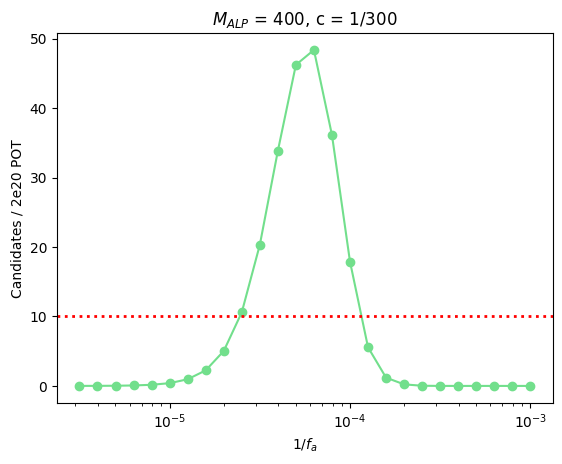

Scanning over fa's for '$M_{ALP}$ = 450, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.0033333333333333335


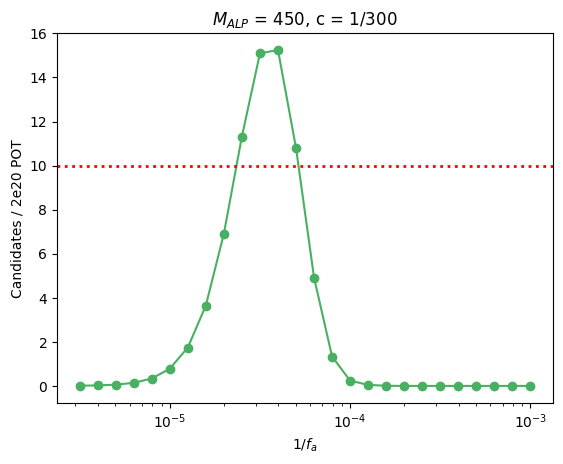

Scanning over fa's for '$M_{ALP}$ = 500, $c$ = 0.01, $fa$ = 100000.0'; new cl = 0.0033333333333333335


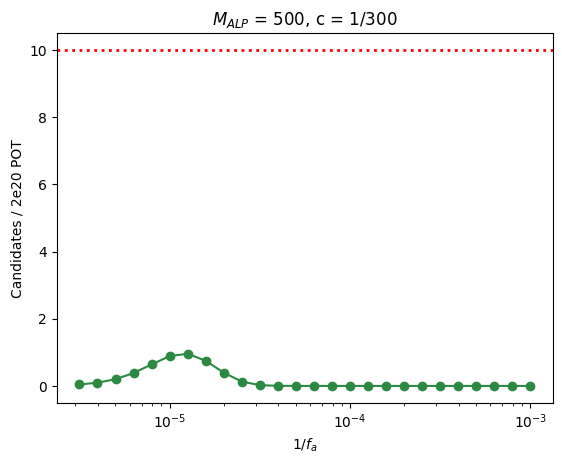

Scanning over fa's for '$M_{ALP}$ = 600, $c$ = 0.01, $fa$ = 1000000.0'; new cl = 0.0033333333333333335


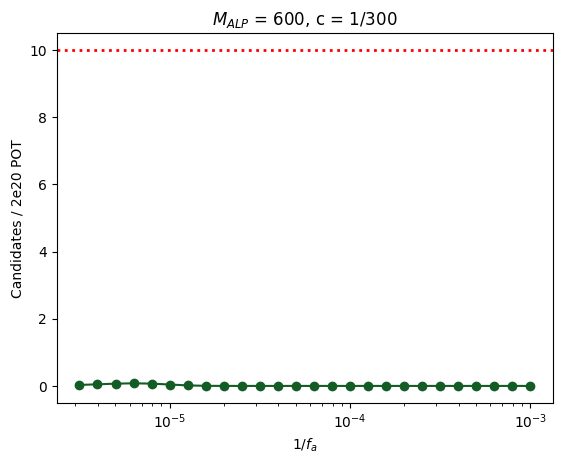

Scanning over fa's for '$M_{ALP}$ = 650, $c$ = 0.01, $fa$ = 1000000.0'; new cl = 0.0033333333333333335


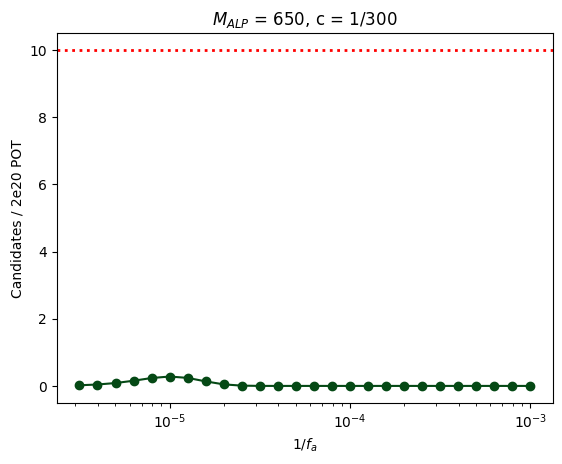

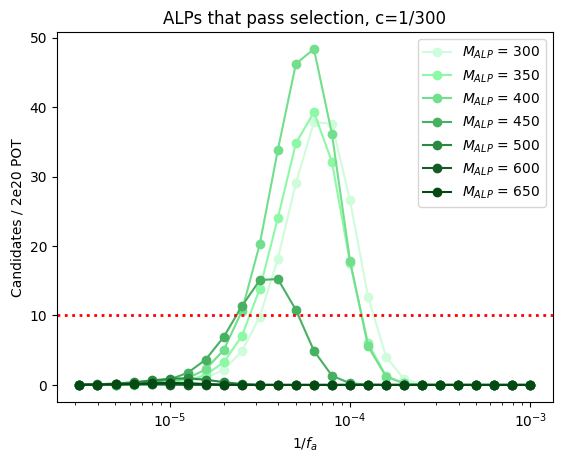

CPU times: user 38min 6s, sys: 14.1 s, total: 38min 20s
Wall time: 37min 58s


In [22]:
%%time
# 23.10.10. FIX IT.

# LOOP OVER CLs

test_cls = [1/300.] # [1/36., 1/100., 1/300., 1/1000.]
clDenoms = ['300'] # ['36','100', '300', '1000']
for cl in range(len(test_cls)):

    new_cl = test_cls[cl]
    clDenom = clDenoms[cl]
    if new_cl > 1/200.:
        test_inv_fas = np.logspace(-6,-4,21) # 1/36, 1/100
    else:
        test_inv_fas = np.logspace(-5.5,-3,26) # 1/300, 1/1000.
    
    alp_new_ns = [] # one entry per sample (mass point), each entry is a list that has same length as test_inv_fas.
    for i in range(len(alp_nosup_files)):
        #if i==1: break
        new_n = []
        df = evtdf[categories[5+i]]
        name = categories[5+i].name
        print("Scanning over fa's for %a; new cl = " % name + str(new_cl))
        old_fa = alp_nosup_fa[i]
        old_cl = alp_nosup_cl[i] #float(alp_nosup_mcdfs[i].iloc[0].C2)
        for new_fa in 1./test_inv_fas:
            rescale = []
            for idx in df.index:
                row = alp_nosup_mcdfs[i].loc[(idx[1],idx[2], 0)]
                rescale.append( float(reweight_alps(old_fa, new_fa, old_cl, new_cl, row.start, row.enter, 
                                              row.exit, row.decay_length, row.allowed_decay_fraction))
                              )
            x = sum(np.array(df.scale)*np.array(rescale))
            #print(x)
            new_n.append(x)
        alp_new_ns.append(np.array(new_n))
    
        plt.plot(test_inv_fas, np.array(new_n), '-o', label=name.split(',')[0], color=greens[i])
        plt.xscale('log')
        plt.title(name.split(',')[0] + ', c = 1/' + clDenom)
        plt.ylabel("Candidates / %s" % POTSTR)
        plt.xlabel("$1/f_a$")
        plt.axhline([10], linestyle=":", color="r", linewidth=2)
        plt.show()
    
    if savestuff:
        alp_new_ns_df = pd.DataFrame(alp_new_ns)
        alp_new_ns_df.to_pickle(
            dir + 'alp_new_ns_df_clDenom'+clDenom
        )
    
    for i in range(len(alp_new_ns)):
        plt.plot(test_inv_fas, alp_new_ns[i], '-o', label=categories[5+i].name.split(',')[0], color=greens[i])
    plt.xscale('log')
    plt.title('ALPs that pass selection, c=1/'+clDenom)
    plt.ylabel("Candidates / %s" % POTSTR)
    plt.xlabel("$1/f_a$")
    plt.axhline([10], linestyle=":", color="r", linewidth=2)
    plt.legend()
    if savestuff:
        plt.savefig(dir + "ALP_fa_sensitivity_clDenom"+clDenom+".pdf")
    plt.show()
    

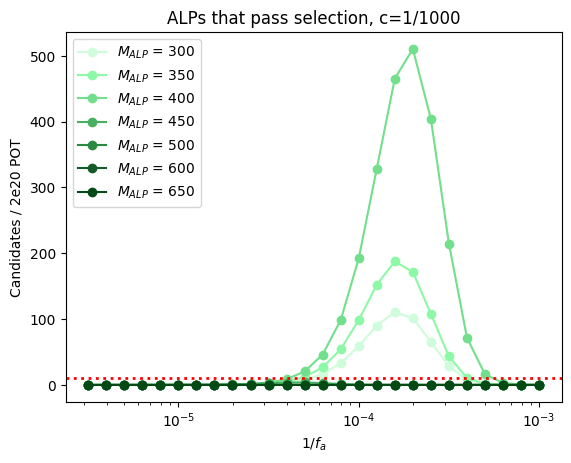

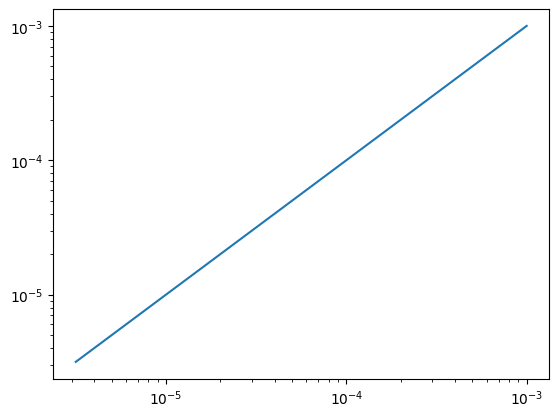

In [21]:
for i in range(len(alp_new_ns)):
    plt.plot(test_inv_fas, alp_new_ns[i], '-o', label=categories[5+i].name.split(',')[0], color=greens[i])
plt.xscale('log')
#plt.yscale('log')
plt.title('ALPs that pass selection, c=1/'+clDenom)
plt.ylabel("Candidates / %s" % POTSTR)
plt.xlabel("$1/f_a$")
plt.axhline([10], linestyle=":", color="r", linewidth=2)
plt.legend()
if savestuff:
    plt.savefig(dir + "ALP_fa_sensitivity_clDenom"+clDenom+".pdf")
plt.show()

#test = np.logspace(-5.5,-3,21)
#plt.plot(test, test)
#plt.xscale('log')
#plt.yscale('log')
#plt.show()

In [59]:
# See how things change if you just scale cl:

df = alp_nosup_mcdfs[0]
name = categories[5].name
print(name.split(',')[0], '\n')
old_fa = alp_nosup_fa[0]
old_cl = alp_nosup_cl[0]
idx = df.index[0] # note: the df I'm getting idx from here is different than what I get it from in func def.
#print(idx)
row = df.loc[idx] 
new_cl = 1/300.
factor = reweight_alps(old_fa, 10000., old_cl, old_cl, row.start, row.enter, 
              row.exit, row.decay_length, row.allowed_decay_fraction)
print('\n', float(factor))
#df
#row

$M_{ALP}$ = 300 

cl, fa:  0.01 ,  10000.0
decay_weight:  3.96477414862782e-13
mean_dist:  2880.199719274784
decay in icarus:  4.0118938432227004e-13
f:  0.9882549996494848

 1.3051631069858734e-08


In [45]:
evtdf

slc                          \
                                     is_clear_cosmic      vertex               
                                                               x           y   
                                                                               
                                                                               
                                                                               
sample __ntuple entry rec.slc..index                                           
0      10       6     0                            0 -137.550140   80.211090   
       49       2     1                            0 -139.672394  -60.575729   
       87       20    10                           0  210.485367  -56.962399   
       105      15    14                           0  142.216400  -46.298374   
       110      13    0                            0 -165.103683 -161.912247   
..                                               ...         ...         ...   
12     4279     172   1                            0 -187.539886   23.401184   
       4444     45    0                            0 -198.929413 -101.789307   
       4502     127   19                           0  255.800964  -55.191528   
       6150     236   17                           0  214.587585   21.150330   
       6645     120   0                            0 -160.763794   59.780487   

                                                                               \
                                                 self    tmatch                 
                                               z            eff       pur idx   
                                                                                
                                                                                
                                                                                
sample __ntuple entry rec.slc..index                                            
0      10       6     0               556.435852  182  0.922363  0.988839   0   
       49       2     1              -293.824646  250  0.709152  0.944103   0   
       87       20    10             -195.739227  130  0.867942  0.989385   0   
       105      15    14              404.727722  176  0.848213  0.992334   0   
       110      13    0               615.129761   72  0.893664  0.994344   0   
..                                           ...  ...       ...       ...  ..   
12     4279     172   1               716.523071  261  0.889747  0.979087   0   
       4444     45    0               763.679688  151  0.777646  0.974933   0   
       4502     127   19             -763.117737  118  0.897586  0.999999   0   
       6150     236   17             -627.641968   83  0.888946  0.985770   0   
       6645     120   0              -558.081665  200  0.852075  0.965248   0   

                                                             ...  \
                                     producer          nuid  ...   
                                              crlongtrkdiry  ...   
                                                             ...   
                                                             ...   
                                                             ...   
sample __ntuple entry rec.slc..index                         ...   
0      10       6     0                     0     -0.117672  ...   
       49       2     1                     0     -0.187669  ...   
       87       20    10                    1      0.068722  ...   
       105      15    14                    1     -0.114128  ...   
       110      13    0                     0      0.153792  ...   
..                                        ...           ...  ...   
12     4279     172   1                     0     -0.025453  ...   
       4444     45    0                     0      0.026420  ...   
       4502     127   19                    1     -0.062157  ...   
       6150     236   17                    1     -0.068047  

### Check what the rescaling factors look like. - Okay to skip or delete this section. (But keep the "Sanity Checks!"

Plot a histogram.

If flat, then that means the accept/reject algorithm in the generator would perform pretty much the same way, at least over the energy range of the present sample.

If not flat, should worry more.


In [21]:
# Check it for just one benchmark model for now. Do change both cl and fa. 

df = alp_nosup_mcdfs[0]
name = categories[5].name
print(name.split(',')[0], '\n')
old_fa = alp_nosup_fa[0]
old_cl = alp_nosup_cl[0]

new_cl = 1/300.
new_fa = 10000.

scale_factors = []
old_decay_weights = []
for idx in df.index:
    row = df.loc[idx] 
    output = reweight_alps(old_fa, new_fa, old_cl, old_cl, row.start, row.enter, 
                           row.exit, row.decay_length, row.allowed_decay_fraction)
    scale_factors.append([0])
    old_decay_weights.append([1])

#df

$M_{ALP}$ = 300 



Old cl, fa:  0.01 ,  100000.0
New cl, fa:  0.0033333333333333335 ,  10000.0
0.0, 239.27838039628315, 0.05205742568251677, 2.015516362717654


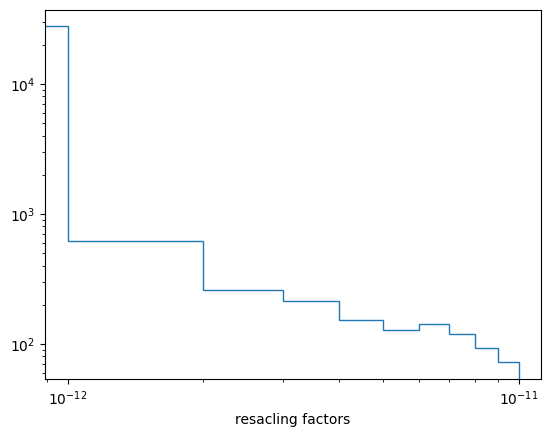

In [19]:
print('Old cl, fa: ', old_cl, ', ', old_fa)
print('New cl, fa: ', new_cl, ', ', new_fa)

print(min(scale_factors), max(scale_factors), 
      np.mean(np.array(scale_factors)), np.std(np.array(scale_factors)), sep=', ')

xrange = (0,1e-11)
plt.hist(scale_factors, histtype='step', range=xrange)
plt.xlabel('resacling factors')
plt.yscale('log')
plt.xscale('log')
plt.show()




<class 'float'>


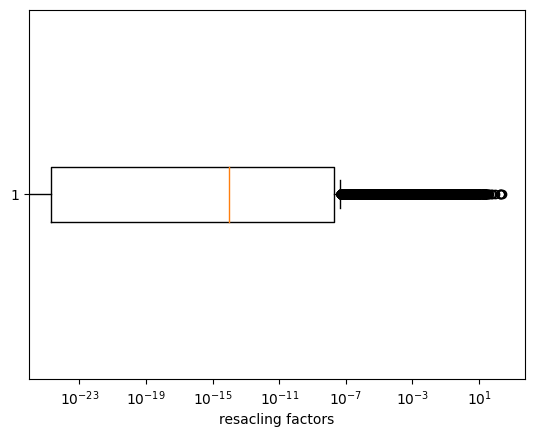

In [18]:
print(type(scale_factors[0]))
plt.boxplot(scale_factors, vert=False)
plt.xscale('log')
plt.xlabel('resacling factors')
plt.show()

## Sanity Checks

Per Slack conversation with Josh 17 October 2023, verify that:

For a given benchmark mass:
1) Peak height is proportional to 1/cl^2
2) optimal fa proportional to cl

These trends are expected to break down when you get to low cl, around 1/1000, where the the lepton decay mode no longer dominates.

In [21]:
new_ns_bycl = [
    'alp_new_ns_df_clDenom36',
    'alp_new_ns_df_clDenom100',
    'alp_new_ns_df_clDenom300',
    'alp_new_ns_df_clDenom1000'
]

# 7 is the number of benchmark masses we are testing.
blank = []
best_fas = [blank.copy()] * 7
peak_rates = [blank.copy()] * 7
              
# ISSUE: appending lists within lists affects all lists in the superlist.

m300_best_fa = [] # will have same length as number of cl_s I tested.
m300_peak_rate = []

for n in range(len(new_ns_bycl)):
    df = pd.read_pickle(dir+new_ns_bycl[n])
    #alp_new_ns_df_clDenom100.shape
    if n <2:
        test_inv_fas = np.logspace(-6,-4,21) # 1/36, 1/100
    else:
        test_inv_fas = np.logspace(-5.5,-3,26) # 1/300, 1/1000.
    row = np.array(df.loc[0])
    m300_peak_rate.append(np.max(row))
    m300_best_fa.append(test_inv_fas[np.argmax(row)])
    
    continue
    # insert for loop over masses (df rows) here. for now, just do the first row.
    for m in range(7):
        #print('m:', m)
        row = np.array(df.loc[m])
        #print(row.shape)
        peak_rates[m].append(np.max(row))
        #print(np.max(row))
        best_fas[m].append(test_inv_fas[np.argmax(row)])
        #print(test_inv_fas[np.argmax(row)])
        #print('shapes: ', len(peak_rates[m]), ', ', len(peak_rates[m+1]))
        #print('')
    
    #print('')
    #peak_rate = np.max()
        

# rows are masses
# columns are values of fa

4
4


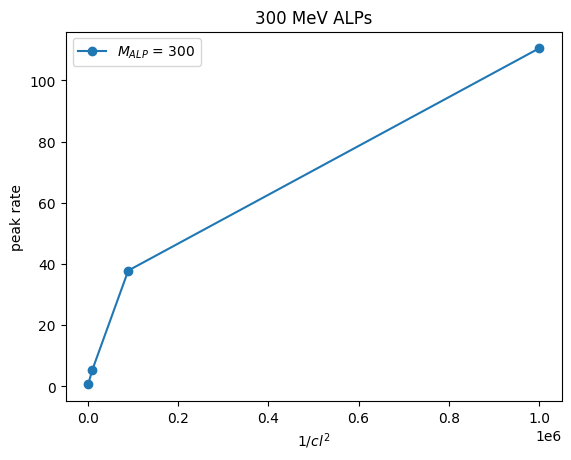

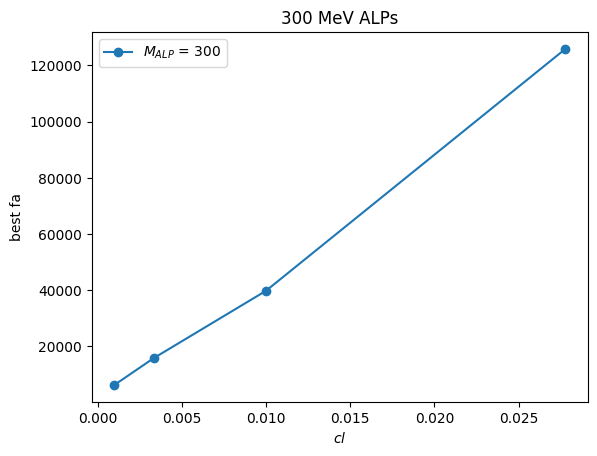

In [37]:
#for m in range(7):
#    plt.plot([1/36**2, 1/100**2, 1/300**2, 1/1000**2], )

print(len(m300_peak_rate))
print(len(m300_best_fa))
i=0

plt.plot([36**2, 100**2, 300**2, 1000**2], m300_peak_rate, '-o', 
         label=categories[5+i].name.split(',')[0])#, color=greens[i])
plt.legend()
plt.title('300 MeV ALPs')
plt.xlabel('$1/cl^2$')
plt.ylabel('peak rate')
plt.show()

plt.plot([1/36, 1/100, 1/300, 1/1000], np.array([1.]*len(m300_best_fa))/m300_best_fa, '-o', 
         label=categories[5+i].name.split(',')[0])#, color=greens[i])
plt.legend()
plt.title('300 MeV ALPs')
plt.xlabel('$cl$')
plt.ylabel('best fa')
plt.show()

## To plot the sensitivity plots I made above, but by reading in what I've already calculated and saved:

Also, here I will add stars at the benchmarks that were used for generation (and so have no weight rescaling).

Also print the value of parameter on x axis that gives peak sensitivity for each curve.

In [15]:
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.000160,0.000402,0.001009,0.002531,0.006340,0.015857,0.039555,0.098280,0.242661,5.933254e-01,...,9.016068e+01,1.104639e+02,1.014032e+02,6.526770e+01,2.813650e+01,8.077088e+00,1.434241e+00,1.049873e-01,1.468789e-03,1.304792e-06
1,0.000244,0.000612,0.001536,0.003852,0.009653,0.024163,0.060355,0.150267,0.372193,9.143850e-01,...,1.522846e+02,1.876202e+02,1.714794e+02,1.077666e+02,4.320127e+01,1.066030e+01,1.830888e+00,2.429510e-01,1.343658e-02,1.082553e-04
2,0.000388,0.000975,0.002448,0.006141,0.015400,0.038579,0.096491,0.240732,0.598220,1.477288e+00,...,3.286822e+02,4.653868e+02,5.104359e+02,4.040132e+02,2.146634e+02,7.182714e+01,1.600231e+01,3.088674e+00,3.985441e-01,1.497074e-02
3,0.000851,0.002121,0.005266,0.012986,0.031682,0.076008,0.177602,0.398295,0.838483,1.603896e+00,...,6.671230e-02,1.281982e-02,2.002599e-03,8.770206e-05,3.942762e-07,4.498030e-11,1.492032e-17,4.755243e-28,6.638213e-45,8.078268e-72
4,0.003886,0.008734,0.018482,0.035754,0.060774,0.086241,0.096027,0.078223,0.043228,1.493126e-02,...,3.785812e-24,1.495545e-37,5.505488e-59,4.217384e-93,2.948378e-147,3.716303e-233,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,0.002664,0.004420,0.006304,0.007341,0.006536,0.004097,0.001582,0.000295,0.000018,2.013188e-07,...,1.163246e-147,4.213142e-234,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,0.001760,0.003882,0.007961,0.014609,0.022737,0.027960,0.024989,0.014901,0.005448,1.099719e-03,...,1.624766e-47,6.426605e-75,1.670036e-118,1.043461e-187,1.676406e-297,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


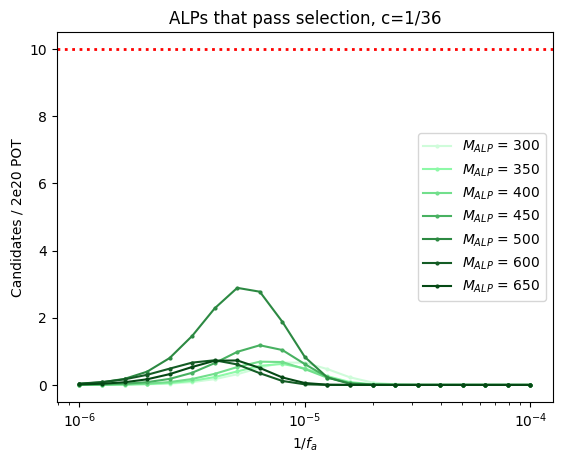

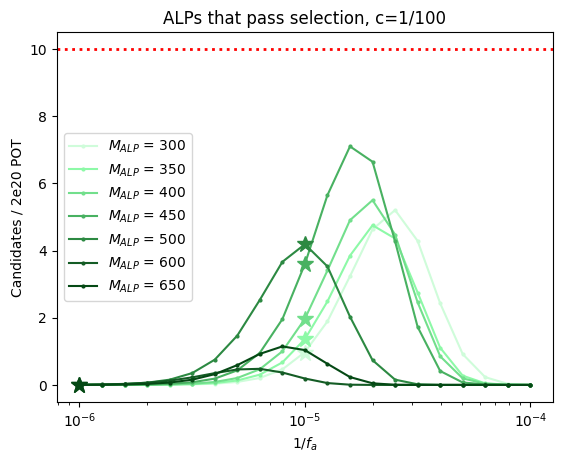

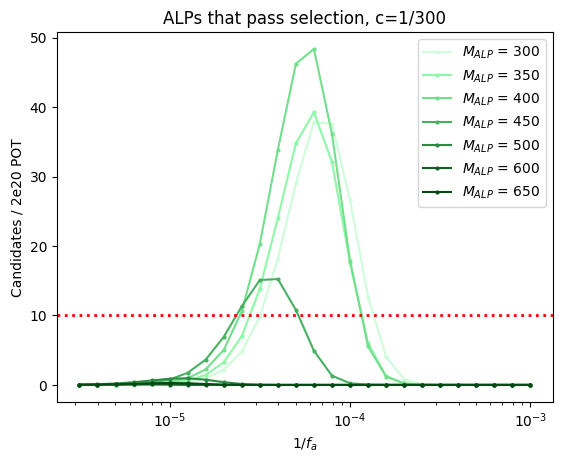

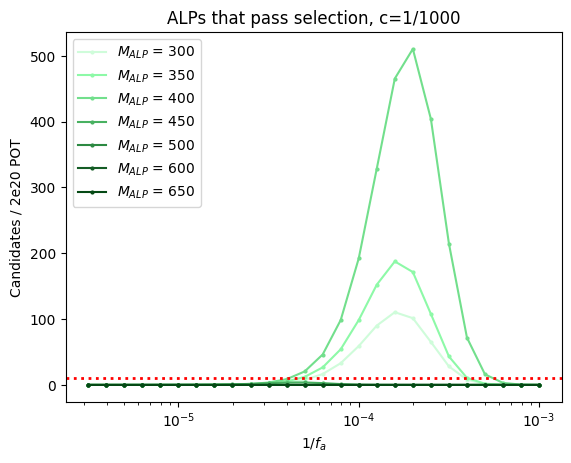

In [12]:
new_ns_bycl = [
    'alp_new_ns_df_clDenom36',
    'alp_new_ns_df_clDenom100',
    'alp_new_ns_df_clDenom300',
    'alp_new_ns_df_clDenom1000'
]
test_cls = [1/36., 1/100., 1/300., 1/1000.]
clDenoms = ['36','100', '300', '1000']


for n in range(len(new_ns_bycl)):
    clDenom = clDenoms[n]
    df = pd.read_pickle(dir+new_ns_bycl[n])
    if n <2:
        test_inv_fas = np.logspace(-6,-4,21) # 1/36, 1/100
    else:
        test_inv_fas = np.logspace(-5.5,-3,26) # 1/300, 1/1000.
    for m in range(len(df.index)):
        plt.plot(test_inv_fas, df.loc[df.index[m]], '-o', markersize=2, label=categories[5+m].name.split(',')[0], color=greens[m]) #
        if clDenom=='100':
            df100 = evtdf[categories[5+m]]
            #plt.plot(1.E-5, 8,'*', markersize=12)
            plt.plot(1./alp_nosup_fa[m], sum(np.array(df100.scale)),'*', markersize=12, color=greens[m])
    plt.xscale('log')
    #plt.yscale('log')
    plt.title('ALPs that pass selection, c=1/'+clDenom)
    plt.ylabel("Candidates / %s" % POTSTR)
    plt.xlabel("$1/f_a$")
    plt.axhline([10], linestyle=":", color="r", linewidth=2)
    plt.legend()
    if savestuff:
        plt.savefig(dir + "ALP_fa_sensitivity_clDenom"+clDenom+".pdf")
    plt.show()